# Titanic Prediction Using Tree-based Model 🌳🌳

### Workflow
1. Import Necessary Modules
2. Get Data
3. Explore the Dataset
    * Take a peep toward a sample of train & test dataset
    * Identify Frequency of class from categorical variabel of train & test dataset
    * Identify dataset info & missing values of train & test dataset
4. Perform Exploratory Data Analysis (EDA)
5. Perform Data Preprocessing
    * Data Cleaning
    * Feature Engineering
    * Data Standardization & Data Encoding
6. Data Modelling
7. Deciding Best Performer
9. Submission

### 1. Import Necessary Modules

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings

%matplotlib inline 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

### 2. Get the Data

In [5]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

### 3. Explore the Data
Objectives : Getting know more about dataset
- Take a peep toward a sample of train & test dataset
- Identify Frequency of class from categorical variabel of train & test dataset
- Identify dataset info & missing values of train & test dataset

In [6]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
191,1083,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S
335,1227,1,"Maguire, Mr. John Edward",male,30.0,0,0,110469,26.0000,C106,S
132,1024,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.4667,NaN,S
315,1207,3,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,NaN,Q


In [7]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,B20,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S


In [8]:
cat_col = ['Sex', 'Embarked']
def count_cat(X, name):
    print(f'THIS IS {name}')
    for i in cat_col : 
        print(i)
        print(X[i].value_counts())
    print('\n')

In [9]:
count_cat(train, 'TRAIN DATASET')
count_cat(test, 'TEST DATASET')

THIS IS TRAIN DATASET
Sex
male      577
female    314
Name: Sex, dtype: int64
Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


THIS IS TEST DATASET
Sex
male      266
female    152
Name: Sex, dtype: int64
Embarked
S    270
C    102
Q     46
Name: Embarked, dtype: int64




In [10]:
def describe(x, name):
    print(f'THIS IS {name}')
    print(x.info())
    print(x.isnull().sum())

In [11]:
describe(train, 'TRAIN DATASET')
print('\n')
describe(test, 'TEST DATASET')

THIS IS TRAIN DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked

### 4. Perform Exploratory Data Analysis (EDA)
Objectives :
Perform EDA on focusing target variable (Survived)
   - How many survivor ? (Number of Survivor)
   - How distribution of target variable based on :
        - PClass
        - Sex
        - Age
        - Embarked
        - SibsP
        - Fare

#### How Many Survivor ?

In [12]:
plt.style.use('ggplot')

colors = ["#ffb400", "#d2980d", "#a57c1b", "#786028", "#363445", "#48446e", "#5e569b", "#776bcd", "#9080ff"]

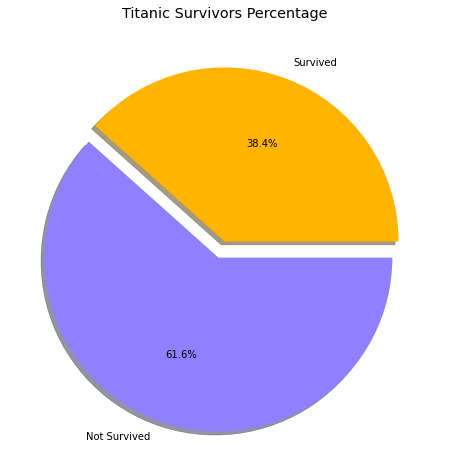

In [13]:
surv, not_surv =  train['Survived'].value_counts()[1], train['Survived'].value_counts()[0]

color = ["#ffb400", "#9080ff"]
labels = ['Survived', 'Not Survived']
sizes = [surv, not_surv]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize = (10, 8))
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', 
      shadow =True, colors = color)
plt.title('Titanic Survivors Percentage')

plt.show()

#### Investigate Data Distribution Based on Target Variables 
- Survived based on Sex
- Survived based on PClass
- Survived based on SibSp
- Survived based on Age
- Survived based on Embarked
- Survived based on Fare

#### Survived Based on Sex, PClass, Embarked and Fare

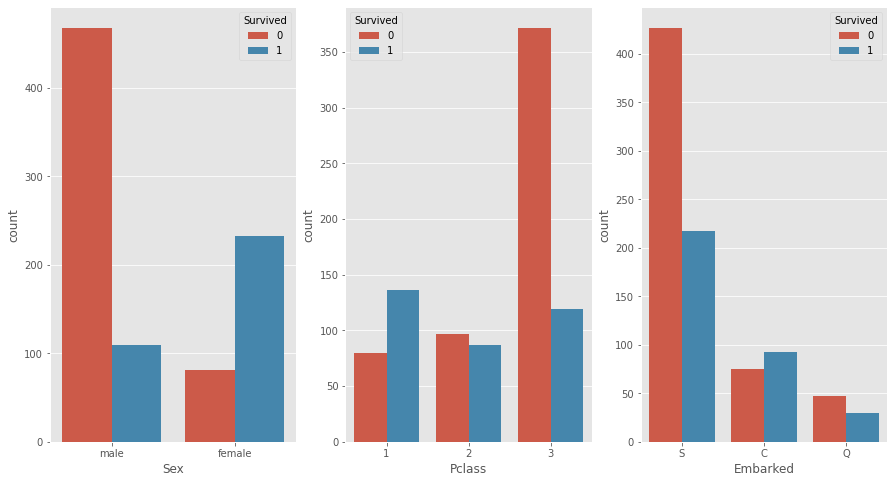

In [14]:
fig, axs = plt.subplots(ncols=3, nrows = 1, figsize = (15, 8))

ax1 = sns.countplot(x='Sex', hue='Survived', data = train, ax=axs[0])
ax2 = sns.countplot(x='Pclass', hue='Survived', data = train, ax=axs[1])
ax3 = sns.countplot(x='Embarked', hue='Survived', data = train, ax=axs[2])

plt.show()

#### Survived Based on Age and SibSp

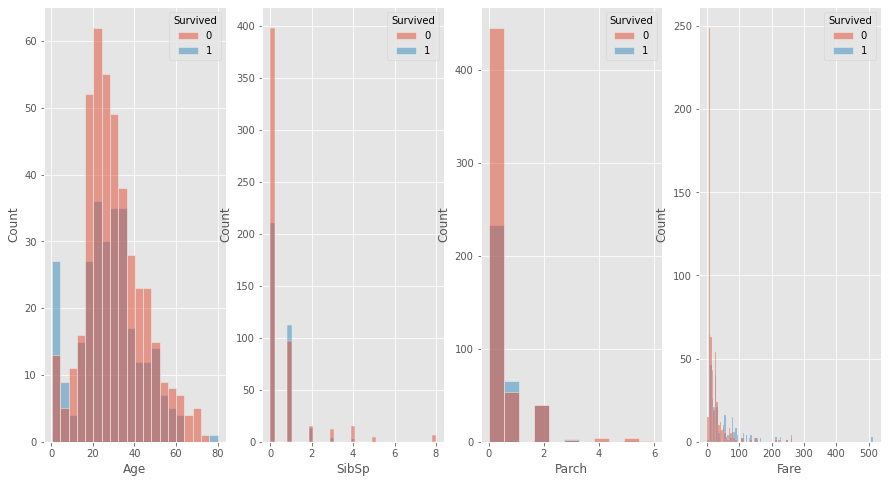

In [15]:
fig, axs = plt.subplots(ncols=4, nrows = 1, figsize = (15, 8))

ax1 = sns.histplot(x='Age', hue='Survived', data = train, ax=axs[0])
ax2 = sns.histplot(x='SibSp', hue='Survived', data = train, ax=axs[1])
ax3 = sns.histplot(x='Parch', hue='Survived', data = train, ax=axs[2])
ax4 = sns.histplot(x='Fare', hue='Survived', data = train, ax=axs[3])

plt.show()

### 5. Perform Data Preprocessing 
Objectives : 
* Data Cleaning
* Outliers Detection
* Feature Engineering
* Data Standardization & Data Encoding

#### Data Cleaning

##### Data Cleaning on Age Variables

In [16]:
age_median = np.nanmedian(train['Age'])
train['Age'] = train['Age'].replace({np.nan : age_median})

In [17]:
train['Age'] = train['Age'].astype('int64')

##### Data Cleaning on Embarked Feature

In [18]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
train['Embarked'] = train['Embarked'].fillna('S')

##### Drop Unused Features

In [20]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis= 1)

##### Outliers Detection

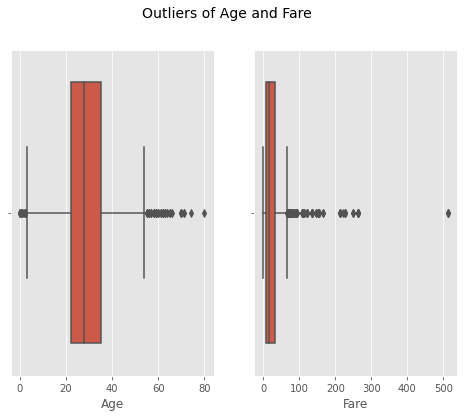

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (8, 6))

plt.suptitle('Outliers of Age and Fare', fontsize =14)

ax1 = sns.boxplot(train['Age'], ax = axs[0])
ax2 = sns.boxplot(train['Fare'], ax = axs[1])

plt.show()

In [22]:
#here we are detecting outliers :
def find_outliers_IQR(data, name):
   q1 = np.percentile(data, 25, interpolation = 'linear') 
   q3 = np.percentile(data, 75, interpolation = 'linear') 
   IQR=q3-q1
   lowerlim = q1 - 1.5 * IQR
   upperlim = q3 + 1.5 * IQR
   outliers = data[((data < lowerlim) | (data>upperlim))]
   print(f'Variable Names : {name}')
   print(f'Number of Outliers : {len(outliers)}')
   print(f'Lower Limit Values : {lowerlim}')
   print(f'Upper Limit Values : {upperlim}')

In [23]:
find_outliers_IQR(train['Age'], 'Age')
print('\n')
find_outliers_IQR(train['Fare'], 'Fare')

Variable Names : Age
Number of Outliers : 66
Lower Limit Values : 2.5
Upper Limit Values : 54.5


Variable Names : Fare
Number of Outliers : 116
Lower Limit Values : -26.724
Upper Limit Values : 65.6344


#### Feature Engineering

##### Create Family variables

In [24]:
train['Family'] = train['SibSp'] + train['Parch']

##### Label Encoding on Sex Variables

In [25]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

##### Create Dummies for Embarked Variable

In [26]:
train = pd.get_dummies(train)

##### Remove SibSp & Parch Variable

In [27]:
train = train.drop(['SibSp', 'Parch'], axis = 1)

##### Separate Feature & Target Variables

In [28]:
X = train.drop('Survived', axis=1)
y = train['Survived']

##### Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Data Modelling
Objectives : Build Tree-based Prediction Model and Select Best Performer Model
- Build Tree-based Prediction Model 
    - Decision Trees
    - Random Forest
    - Gradient Boost
- Perform RandomizedSearchCV
- Perform GridSearchCV
- Validate Results Using Cross Val Score
- Select Best Performer

##### Build Tree-based Prediction Model

In [30]:
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

##### Perform RandomizedSearchCV

In [30]:
dt_par = {'max_depth' : range(2, 10, 2),
        'max_features' : range(2, 10, 2)}
rf_par = {'n_estimators' : range(100, 300, 10),
          'max_depth' : range(2, 10, 2),
          'max_features' : range(2, 10, 2)}
gb_par = {'n_estimators' : range(100, 300, 10),
          'max_depth' : range(2, 10, 2),
          'max_features' : range(2, 10, 2),
         'learning_rate' : [0.05]}

In [34]:
model = [dt, rf, gb]
attempt = 0
cv = KFold(n_splits=10, shuffle = True, random_state=42 )

while attempt < 3: 
    attempt += 1
    print(f'Attempts No : {attempt}')
    for i in model:
        if(i == dt):
            randomcv = RandomizedSearchCV(dt, dt_par, cv=cv, scoring='accuracy')
        elif(i == rf ):
            randomcv = RandomizedSearchCV(rf, rf_par, cv=cv, scoring='accuracy')
        else:
            randomcv = RandomizedSearchCV(gb, gb_par, cv=cv, scoring='accuracy')
        randomcv.fit(X_train, y_train)
        print(f'Model {i}')
        print(f'Best Parameter : {randomcv.best_params_}')
        print(f'Accuracy Score : {randomcv.best_score_:.2f}')
    print('\n')

Attempts No : 1
Model DecisionTreeClassifier(random_state=42)
Best Parameter : {'max_features': 2, 'max_depth': 6}
Accuracy Score : 0.82
Model RandomForestClassifier(random_state=42)
Best Parameter : {'n_estimators': 250, 'max_features': 4, 'max_depth': 6}
Accuracy Score : 0.83
Model GradientBoostingClassifier(random_state=42)
Best Parameter : {'n_estimators': 140, 'max_features': 8, 'max_depth': 2, 'learning_rate': 0.05}
Accuracy Score : 0.83


Attempts No : 2
Model DecisionTreeClassifier(random_state=42)
Best Parameter : {'max_features': 2, 'max_depth': 6}
Accuracy Score : 0.82
Model RandomForestClassifier(random_state=42)
Best Parameter : {'n_estimators': 140, 'max_features': 4, 'max_depth': 4}
Accuracy Score : 0.83
Model GradientBoostingClassifier(random_state=42)
Best Parameter : {'n_estimators': 290, 'max_features': 4, 'max_depth': 2, 'learning_rate': 0.05}
Accuracy Score : 0.83


Attempts No : 3
Model DecisionTreeClassifier(random_state=42)
Best Parameter : {'max_features': 2, '

##### Perform GridSearchCV

In [33]:
cv = KFold(n_splits=10, shuffle = True, random_state=42 )
def GridSearch(model, parameter):
    gridcv = GridSearchCV(model, parameter, scoring = 'accuracy', cv = cv)
    gridcv.fit(X_train, y_train)
    print(f'Best Parameter {gridcv.best_params_}')
    print(f'Accuracy Score {gridcv.best_score_:3f}')
    
dt_par = {'max_features': [2],
         'max_depth' : [6]}
rf_par = {'n_estimators': range(140, 280, 10),
         'max_features' : [4,6] ,
         'max_depth' : [4, 6]}
gb_par = {'n_estimators' : [140, 290, 10],
         'max_features' : [2, 4, 8],
         'max_depth' : [2],
         'learning_rate': [0.05]}

In [34]:
GridSearch(rf, rf_par)

Best Parameter {'max_depth': 4, 'max_features': 6, 'n_estimators': 270}
Accuracy Score 0.832844


In [35]:
GridSearch(gb, gb_par)

Best Parameter {'learning_rate': 0.05, 'max_depth': 2, 'max_features': 4, 'n_estimators': 290}
Accuracy Score 0.832864


In [37]:
GridSearch(dt, dt_par)

Best Parameter {'max_depth': 6, 'max_features': 2}
Accuracy Score 0.820188


##### Validate Results Using Cross Val Score

In [38]:
cv = KFold(n_splits=10, shuffle = True, random_state=42 )
rf_best = RandomForestClassifier(n_estimators = 270, max_depth = 4, max_features = 6, random_state = 42)
gb_best = GradientBoostingClassifier(n_estimators = 290, max_depth = 2, max_features = 4, learning_rate = 0.05, random_state=42)
dt_best = DecisionTreeClassifier(max_depth = 6, max_features = 2, random_state=42)

model = [rf_best, gb_best, dt_best]
for i in model:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    train_score = cross_val_score(i, X_train, y_train, scoring = 'accuracy', cv = cv).mean()
    test_score = cross_val_score(i, X_test, y_test, scoring = 'accuracy', cv = cv ).mean()
    print(i)
    print(f'Train Score : {train_score}, Test Score : {test_score}')

RandomForestClassifier(max_depth=4, max_features=6, n_estimators=270,
                       random_state=42)
Train Score : 0.8328442879499217, Test Score : 0.8055555555555556
GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=4,
                           n_estimators=290, random_state=42)
Train Score : 0.8328638497652582, Test Score : 0.8111111111111111
DecisionTreeClassifier(max_depth=6, max_features=2, random_state=42)
Train Score : 0.82018779342723, Test Score : 0.7611111111111111


After perform cross validation we can see that gradientboost was the best performer 

### Submission

In [39]:
test2 = test.copy()

In [40]:
age_median = np.nanmedian(test['Age'])
test['Age'] = test['Age'].replace({np.nan : age_median})
test['Age'] = test['Age'].astype('int64')

fare_median = np.nanmedian(test['Fare'])
test['Fare'] = test['Fare'].replace({np.nan : fare_median})

In [41]:
test['Family'] = test['SibSp'] + test['Parch']

In [42]:
le = LabelEncoder()
test['Sex'] = le.fit_transform(test['Sex'])

In [43]:
test = test[['Pclass', 'Sex', 'Age', 'Fare', 'Family', 'Embarked']]

In [44]:
test = pd.get_dummies(test)

In [45]:
y_pred = gb_best.predict(test)

In [46]:
submission=pd.DataFrame({'PassengerId':test2['PassengerId']  ,'Survived':y_pred})

In [47]:
filename='Titanic Prediction Using Tree-Based Model'
submission.to_csv(filename,index=False)

print('Saved File: '+filename)

Saved File: Titanic Prediction Using Tree-Based Model
